# Import Libraries

In [5]:
import pandas as pd
import numpy as np

In [7]:
# 1. Load the datset
df = pd.read_csv('healthcare_dataset.csv')


In [8]:
# 2. Display 5 rows of the database table
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# 3. Show the summary statistics (mean, median, mode, etc.) for numerical columns.
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [16]:
# 4. Find the number of unique values in each column.
df.nunique().sum()

184401

In [ ]:
# 5.Filter the dataset to show only rows where the "Age" is greater than 50.
df[df['Age'] > 50]
  # Using the .loc methoddf[df['Age'] > 50].sum()

Name                  LesLie TErRyDaNnY sMitHJASmINe aGuIlaRChRISTop...
Age                                                             1947362
Gender                MaleFemaleMaleFemaleMaleFemaleFemaleFemaleMale...
Blood Type            A+A-AB+AB-O+A+AB+A+B+A-O+A+AB+AB+O-B+AB-O-B-B-...
Medical Condition     ObesityObesityAsthmaCancerCancerDiabetesAsthma...
Date of Admission     2019-08-202022-09-222020-07-012021-05-232020-0...
Doctor                Samantha DaviesTiffany MitchellDaniel Ferguson...
Hospital              Kim IncCook PLCSons Rich andPadilla-WalkerScha...
Insurance Provider    MedicareAetnaCignaUnitedHealthcareMedicareCign...
Billing Amount                                         731497407.754284
Room Number                                                     8641607
Admission Type        EmergencyEmergencyElectiveElectiveUrgentEmerge...
Discharge Date        2019-08-262022-10-072020-07-142021-06-222020-0...
Medication            IbuprofenAspirinAspirinParacetamolParaceta

In [ ]:
#6.Count the number of people aged above 50
count = df[df['Age'] > 50].shape[0]

# Print the count of people aged above 50
print(count)


28667


In [26]:
# 7. Count the occurrences of each "Blood Type" in the dataset.

blood_types = df['Blood Type'].value_counts()

blood_types

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [33]:
# 8. Create a new column that calculates the number of days between the "Date of Admission" and "Discharge Date."
df.head()
# Calculate the number of days stayed
# Convert the columns to datetime if they aren't already
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Numbers of Days Stayed'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Numbers of Days Stayed
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [39]:
# 9. Find the total "Billing Amount" for each "Insurance Provider."
df_grouped = df.groupby('Insurance Provider')['Billing Amount'].sum().reset_index()
df_grouped['Billing Amount'] = df_grouped['Billing Amount'].apply(lambda x: f'{x:,.0f}' + ' $')
print(df_grouped)



  Insurance Provider Billing Amount
0              Aetna  278,863,103 $
1         Blue Cross  283,254,294 $
2              Cigna  287,139,345 $
3           Medicare  285,720,758 $
4   UnitedHealthcare  282,454,543 $


In [40]:
# 10.Sort the dataset by "Age" in descending order.
df_sorted = df.sort_values(by='Age', ascending=False)
df_sorted

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Numbers of Days Stayed
53825,mIchaeL POtTs,89,Male,A+,Hypertension,2023-01-19,Mary Vaughn,"and Perez, Bennett Townsend",Cigna,9542.739709,289,Emergency,2023-01-28,Paracetamol,Abnormal,9
52857,THomAs PHIllIpS,89,Female,A+,Hypertension,2022-05-22,Mark White,"and Martin, Davidson Cox",Cigna,48274.348627,332,Urgent,2022-05-26,Penicillin,Inconclusive,4
52372,DeBORah McBrIdE,89,Female,O+,Obesity,2021-05-28,Robert Garcia,"and Miller, Olson Olson",Cigna,5692.907188,166,Elective,2021-06-13,Paracetamol,Abnormal,16
54044,MiChAEL DOmINGuEz,89,Male,O+,Cancer,2021-09-07,Bridget Irwin,PLC White,Aetna,7628.951322,363,Elective,2021-09-24,Aspirin,Abnormal,17
54813,JerEmY hArdIN JR.,89,Male,A+,Diabetes,2019-11-05,Willie Stevens,Gray-Solomon,Cigna,7242.641277,113,Elective,2019-11-28,Penicillin,Normal,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55382,kRiStiN orTIZ,13,Male,A-,Asthma,2020-04-01,Donna Fernandez,"Yu and Mckenzie Lucas,",UnitedHealthcare,50526.712855,493,Urgent,2020-04-02,Paracetamol,Abnormal,1
51873,doRothY hoffMAn,13,Female,O-,Cancer,2020-07-18,Suzanne Jones,"Davis Davis, and Davis",Cigna,22316.169323,379,Elective,2020-08-10,Ibuprofen,Abnormal,23
51095,cAthY BARNES,13,Male,O-,Obesity,2023-03-30,Kevin Ellison,Wood-Johnson,Medicare,29170.617795,348,Emergency,2023-04-29,Lipitor,Abnormal,30
50929,kYLE jAcKsoN,13,Female,B-,Asthma,2020-05-24,Barbara Parsons,Small-Shaw,Cigna,31988.673669,156,Emergency,2020-06-15,Paracetamol,Abnormal,22


In [43]:
# 11. Replace any missing values in the "Medication" column with "None."
 # first lets find the missing values in the "Medication" column
df.Medication.isnull().sum()

0

In [52]:
# 12. Identify the rows where the "Billing Amount" is above a certain threshold (e.g., $20,000).
df[df['Billing Amount']>20000]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Numbers of Days Stayed
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal,4
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55489,ANdrEw AGUIlaR,69,Male,O-,Arthritis,2019-06-25,Dustin Pearson,"and Barry White, Jones",Medicare,41893.245150,171,Urgent,2019-07-09,Paracetamol,Normal,14
55494,JEssIcA WHiTe,67,Male,O+,Arthritis,2023-12-11,Jesus Jordan,Miller-Harris,Medicare,42535.301234,378,Emergency,2024-01-04,Ibuprofen,Normal,24
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,9
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28


In [51]:
df[df['Billing Amount']>20000]['Billing Amount'].count()

34061

In [57]:
# 13. Calculate the average "Billing Amount" for each "Room Number."
average_billing = df.groupby('Room Number')['Billing Amount'].mean().round(2) 
average_billing

Room Number
101    26113.99
102    25330.61
103    24059.22
104    24754.00
105    26797.41
         ...   
496    25342.01
497    27920.55
498    25592.65
499    24573.23
500    25091.23
Name: Billing Amount, Length: 400, dtype: float64

In [61]:
# 14. Extract the year from the "Date of Admission" and count the number of patients admitted in each year.
df.columns
df.head(1)
df['Date of Admission'].dt.year.value_counts()



Date of Admission
2020    11285
2023    11026
2022    11017
2021    10931
2019     7387
2024     3854
Name: count, dtype: int64

In [64]:
# 15. Group the dataset by "Doctor" and calculate the average "Billing Amount" for each doctor.
df_grouped = df.groupby('Doctor')['Billing Amount'].mean().reset_index().round(2)
df_grouped

,Doctor,Billing Amount
0,Aaron Acevedo,29047.28
1,Aaron Adams,20162.26
2,Aaron Aguilar,8091.81
3,Aaron Alexander,22120.87
4,Aaron Anderson,40326.06
...,...,...
40336,Zoe Khan,25569.20
40337,Zoe Knight,33601.00
40338,Zoe Nichols,34217.90
40339,Zoe Roberts,38594.42


In [65]:
# 16. Find the most common "Medical Condition" in the dataset.
df['Medical Condition'].value_counts().idxmax()

'Arthritis'

<Axes: xlabel='Date of Admission'>

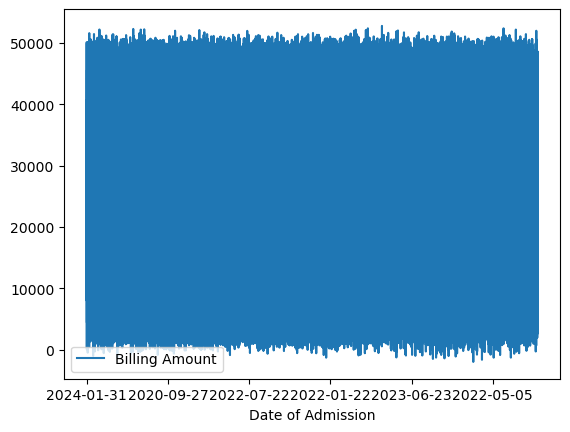

In [2]:
# Plotting in pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('healthcare_dataset.csv')
# Line Plot: Plot the "Billing Amount" over time using the "Date of Admission" column.
df.plot(x='Date of Admission', y='Billing Amount', kind='line')


In [12]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

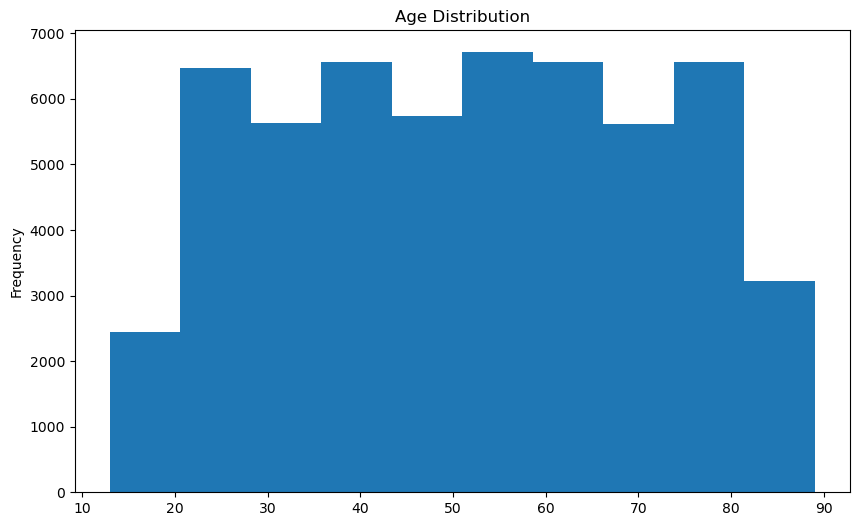

In [3]:
#  Histogram: Plot the distribution of "Age" in the dataset.
df['Age'].plot(kind='hist', figsize=(10, 6), bins=10, title='Age Distribution')


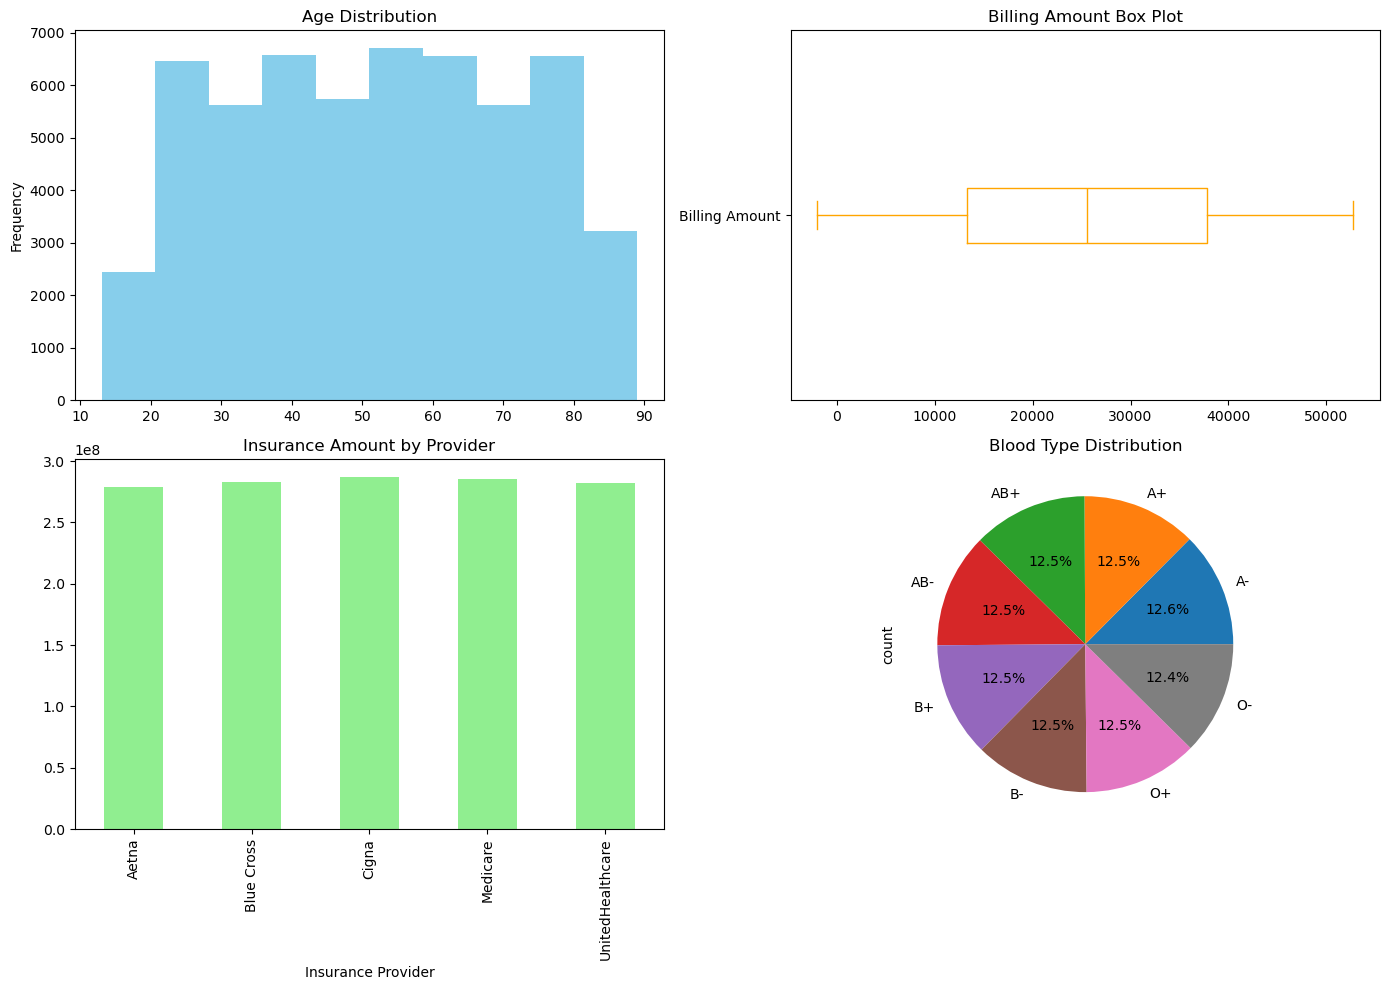

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of Age Distribution
df['Age'].plot(kind='hist', bins=10, ax=axs[0, 0], color='skyblue', title='Age Distribution')

# Box Plot of Billing Amount
df['Billing Amount'].plot(kind='box', ax=axs[0, 1], color='orange', vert=False, title='Billing Amount Box Plot')

# Bar Plot for Insurance Amount by Insurance Provider
df.groupby('Insurance Provider')['Billing Amount'].sum().plot(kind='bar', ax=axs[1, 0], color='lightgreen', title='Insurance Amount by Provider')

# Pie Chart of Blood Type Distribution
df['Blood Type'].value_counts().plot(kind='pie', ax=axs[1, 1], autopct='%1.1f%%', title='Blood Type Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Age Distribution (Histogram):

    Result: The age distribution shows a fairly uniform spread across the different age groups from 10 to 80 years, with patients spanning across all these age ranges. There is no significant skew, and it seems that a broad age demographic is represented in the dataset.

2. Billing Amount Box Plot:

    Result: The box plot indicates a wide range of billing amounts, with a substantial amount of data clustering around the lower range. The plot suggests that billing amounts vary greatly between patients, with some patients incurring significantly higher charges than others.

3. Insurance Amount by Provider (Bar Plot):

    Result: The bar plot reveals that the total insurance amounts for each provider are nearly identical, indicating that no specific insurance provider is leading in terms of total billing. All providers seem to handle a similar volume of healthcare billing.

4. Blood Type Distribution (Pie Chart):

    Result: The pie chart shows that the blood types are evenly distributed, with each blood type (A+, A-, B+, B-, AB+, AB-, O+, O-) representing roughly 12.5% of the total. This suggests a balanced demographic in terms of blood type among patients.

Summary of Results:

    Age: The dataset includes a diverse age range, with no specific age group dominating.
    Billing Amount: There is a large variation in billing amounts, indicating that some patients may require more expensive treatments.
    Insurance: The distribution of billing across insurance providers is similar, with no one provider standing out.
    Blood Type: Blood types are evenly distributed, suggesting no particular bias or prevalence in terms of blood type.

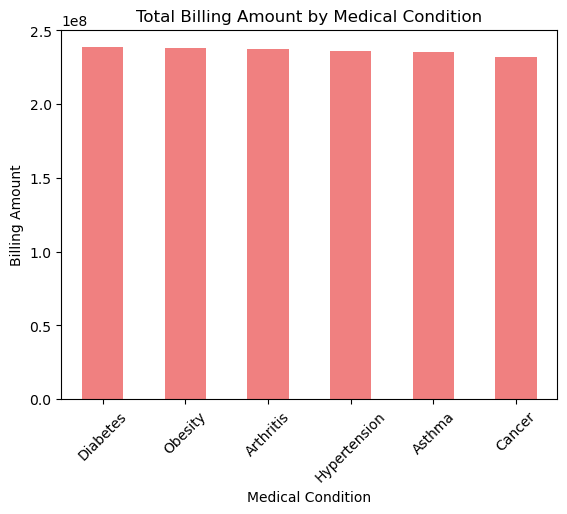

In [ ]:
#2. Total Billing Amount by Medical Condition (Bar Plot):

  # # Purpose: To show which medical conditions incur the highest costs.
 #   Insight: This is valuable for doctors, hospital administrators, and insurance companies to evaluate which conditions lead to higher healthcare costs. This can also guide resource allocation or the need for targeted treatments.
 
billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].sum().sort_values(ascending=False)
billing_by_condition.plot(kind='bar', color='lightcoral')
plt.title('Total Billing Amount by Medical Condition')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.show()


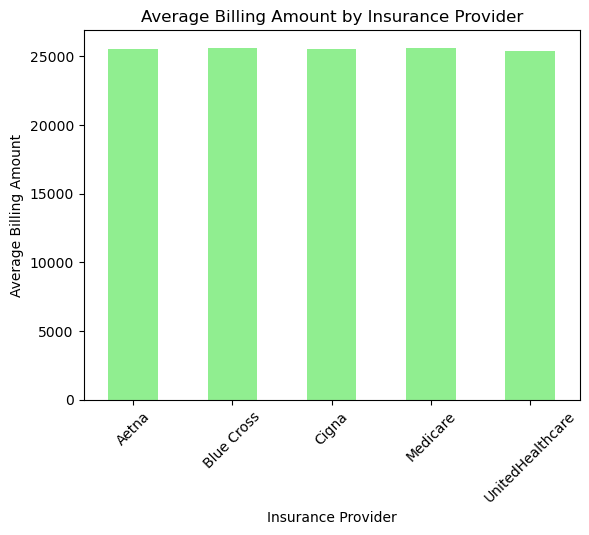

In [9]:
avg_billing_by_provider = df.groupby('Insurance Provider')['Billing Amount'].mean()
avg_billing_by_provider.plot(kind='bar', color='lightgreen')
plt.title('Average Billing Amount by Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.show()


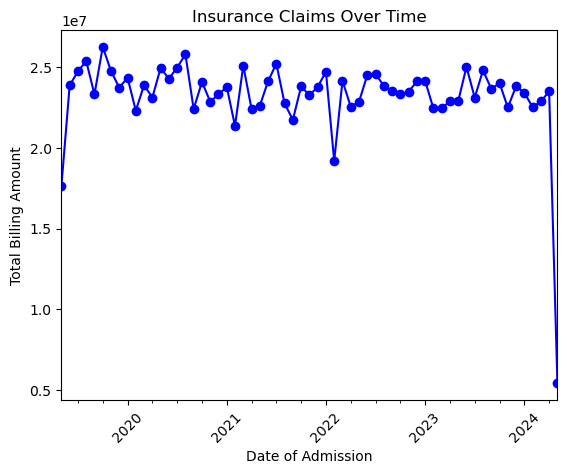

In [10]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
claims_over_time = df.groupby(df['Date of Admission'].dt.to_period('M'))['Billing Amount'].sum()
claims_over_time.plot(kind='line', marker='o', color='blue')
plt.title('Insurance Claims Over Time')
plt.ylabel('Total Billing Amount')
plt.xticks(rotation=45)
plt.show()


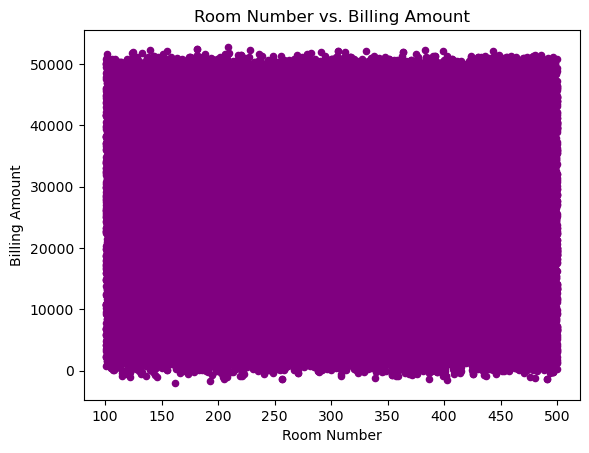

In [11]:
df.plot(kind='scatter', x='Room Number', y='Billing Amount', color='purple')
plt.title('Room Number vs. Billing Amount')
plt.xlabel('Room Number')
plt.ylabel('Billing Amount')
plt.show()
